In [1]:
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import numpy as np
import nbodykit as nb
import momentum as m

In [2]:
#强制重载
import importlib
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

In [3]:
#12_5
#计算无权重
num = '12_5_bin'
cat_nw = m.data_read(num)
#加红移
cat_nw = m.RED(cat_nw)
#加权重
cat_nw['weight'] = 1
#计算矩阵
r00_nw, r01_nw, r11_nw, P00_nw, P01_nw, P11_nw = m.momentum(cat_nw)

In [4]:
#12
#有权重
cat = m.data_read(num)
#加红移
cat = m.RED(cat)
#加权重
cat = m.weight(cat)
#计算矩阵
r00, r01, r11, P00, P01, P11 = m.momentum(cat)

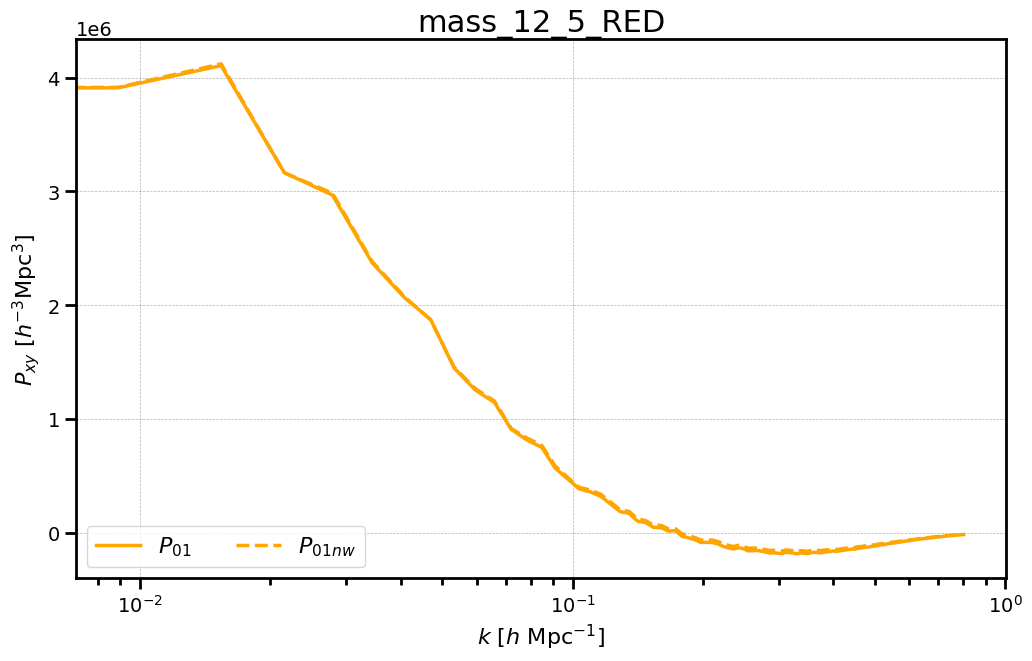

In [5]:
plt.loglog(r01.power['k'], P01, label=r"$P_{01}$", color='orange')
plt.loglog(r01_nw.power['k'], P01_nw, label=r"$P_{01nw}$", linestyle='--', color='orange')
plt.title("mass_12_5_RED")
plt.legend(loc='lower left', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
# plt.xlim(0.01, 0.6)
# # plt.xscale('linear')
plt.yscale('linear')

In [6]:
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

<BinnedStatistic: dims: (k: 159), variables: 5 total>
variables =  ['k', 'power_0', 'power_2', 'power_4', 'modes']


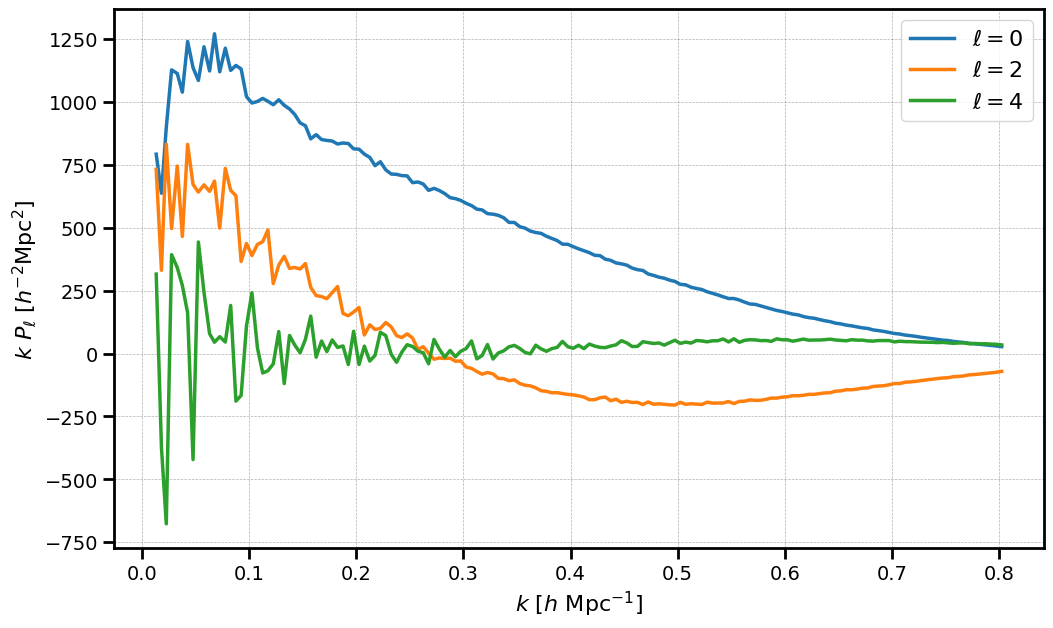

In [7]:
m.density(cat)

<BinnedStatistic: dims: (k: 159), variables: 5 total>
variables =  ['k', 'power_0', 'power_2', 'power_4', 'modes']


Text(0.5, 1.0, 'RSD_w')

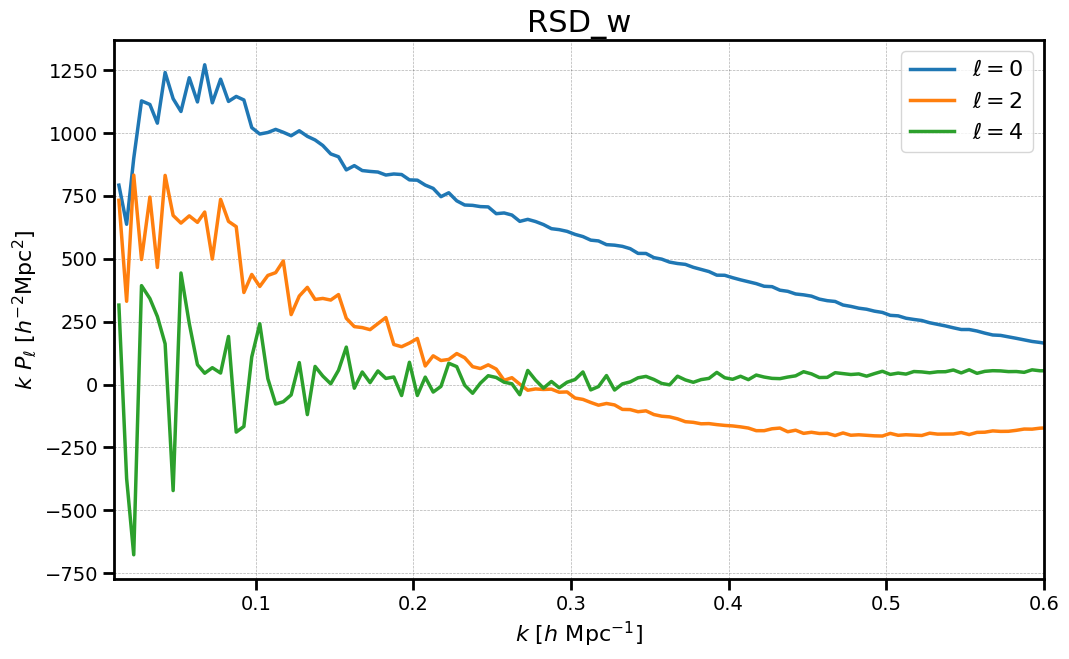

In [8]:
m.density(cat)
plt.xlim(0.01, 0.6)
plt.title('RSD_w')

<BinnedStatistic: dims: (k: 159), variables: 5 total>
variables =  ['k', 'power_0', 'power_2', 'power_4', 'modes']


Text(0.5, 1.0, 'RSD_nw')

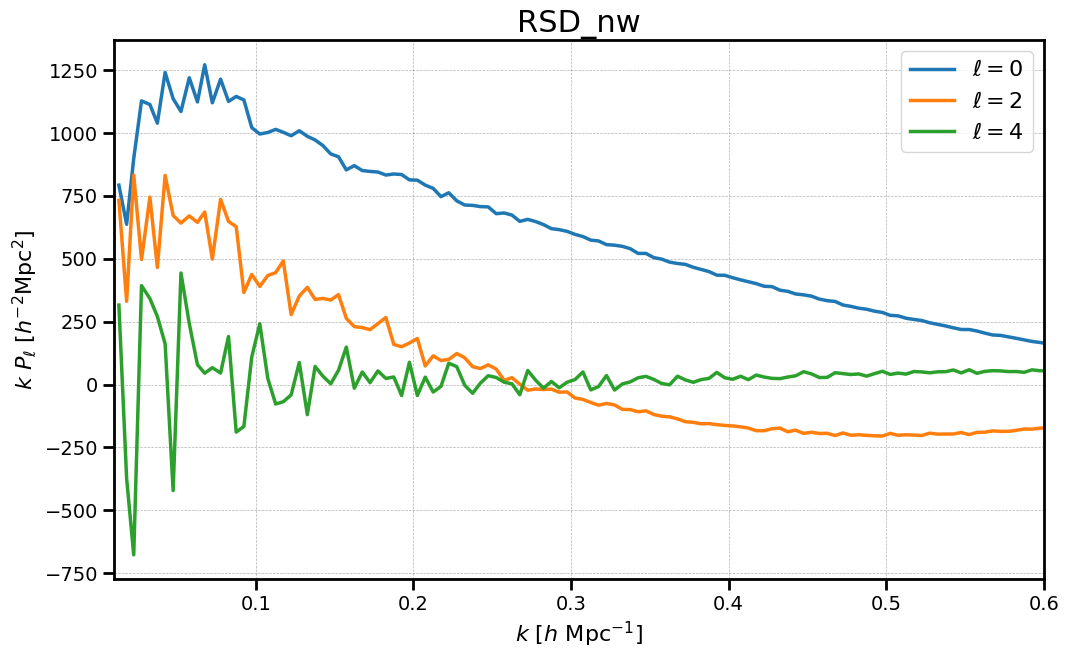

In [9]:
m.density(cat_nw)
plt.xlim(0.01, 0.6)
plt.title('RSD_nw')

In [10]:
z_eff=0.59339
cosmo = cosmology.Planck15
H=cosmo.efunc(z_eff)*100
a=1/(1+z_eff)

In [11]:
print(a*H)

87.44011455618202


In [12]:
def RED(cat):
    line_of_sight_x=(0,0,1)
    cat['vel_x']=cat['Vel']*line_of_sight_x/(a*H)
    print(np.array(cat['vel_x']))
    cat['RsdPos_x']=cat['Pos']+(cat['vel_x']*line_of_sight_x)
    print(np.array(cat['RsdPos_x']))
    # cat['Vx'] = cat['Vel'][:,0]
    return cat

In [13]:
def density(cat):
    if 'weight' not in cat:
        #无权重
        cat['weight'] = 1

    if 'RsdPos_x' in cat:
        mesh = cat.to_mesh(window ='tsc', Nmesh=256,BoxSize=1000,compensated=False,interlaced=True,position='RsdPos_x',value='CentralMvir')
        r = FFTPower(first=mesh,Nmesh=256, mode='2d', BoxSize=1000,dk=0.005, kmin=0.01, Nmu=5, los=[0,0,1], poles=[0,2,4])
    # else:
    #     mesh = cat.to_mesh(window='tsc', Nmesh=512, BoxSize=1000,interlaced=True,compensated=True, position='Pos', weight='weight')
    #     r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[2,4])     
    poles = r.poles
    print(poles)
    print("variables = ", poles.variables)
    for ell in [0, 2, 4]:
        label = r'$\ell=%d$' % (ell)
        P = poles['power_%d' %ell].real
        if ell == 0: P = P - poles.attrs['shotnoise']
        # if ell == 2
        # line, = plt.plot(x, y, label="")
        plt.plot(poles['k'], poles['k'] * P, label=label)
        # line.set_color('')
    plt.legend(loc=0)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")


In [14]:
struct_dtype = np.dtype([
    ('Pos', np.float32, 3),
    ('Vel', np.float32, 3),
    ('Vmax', np.float32),
    ('CentralMvir', np.float32),
    ('StellarMass', np.float32),
    ('HImass', np.float32)
])

In [15]:
def data_read(num):
    data = np.fromfile(f'../filtered_data_h_{num}.dat', dtype=struct_dtype)
    cat = nb.source.catalog.array.ArrayCatalog(data)
    return cat

In [16]:
num = '12_5_bin'
cat_nw = m.data_read(num)
vel = cat_nw['CentralMvir']

In [17]:
line_of_sight_x = (0,0,1)
aa = np.array(cat_nw['Vel']*line_of_sight_x/(a*H))

In [18]:
print(aa)

[[ 0.         -0.          4.08493966]
 [ 0.         -0.          4.97462013]
 [ 0.         -0.          3.71163939]
 ...
 [ 0.         -0.          2.03636632]
 [ 0.         -0.          5.97995767]
 [-0.         -0.          3.40842161]]


In [19]:
# a = np.array(vel)
# print(a.min())

In [20]:
cat_nw = RED(cat_nw)

[[ 0.         -0.          4.08493966]
 [ 0.         -0.          4.97462013]
 [ 0.         -0.          3.71163939]
 ...
 [ 0.         -0.          2.03636632]
 [ 0.         -0.          5.97995767]
 [-0.         -0.          3.40842161]]
[[   2.77068043   10.2081871    19.17385739]
 [   2.77497268   10.20478535   20.06483676]
 [   2.68007112   10.3342514    18.81678961]
 ...
 [   2.11205387   17.46072578  996.0491837 ]
 [   2.61545062   17.27146912 1000.14456949]
 [   2.81020856   17.09973907  997.35849485]]


In [21]:
pos_min = np.min(np.array(cat_nw['RsdPos_x']), axis=0)
pos_max = np.max(np.array(cat_nw['RsdPos_x']), axis=0)

print("Pos各方向的最小值(x,y,z):", pos_min)
print("Pos各方向的最大值(x,y,z):", pos_max)

Pos各方向的最小值(x,y,z): [ 7.05905259e-05  6.10351562e-05 -1.90898193e+01]
Pos各方向的最大值(x,y,z): [1000.         1000.         1017.61849976]


In [22]:
cat_nw['RsdPos_x'] = cat_nw['RsdPos_x']%1000

/tmp/ipykernel_23924/2092425536.py:7: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(window ='tsc', Nmesh=256,BoxSize=1000,compensated=False,interlaced=True,position='RsdPos_x',value='CentralMvir')


<BinnedStatistic: dims: (k: 159), variables: 5 total>
variables =  ['k', 'power_0', 'power_2', 'power_4', 'modes']


Text(0.5, 1.0, 'RSD_nw')

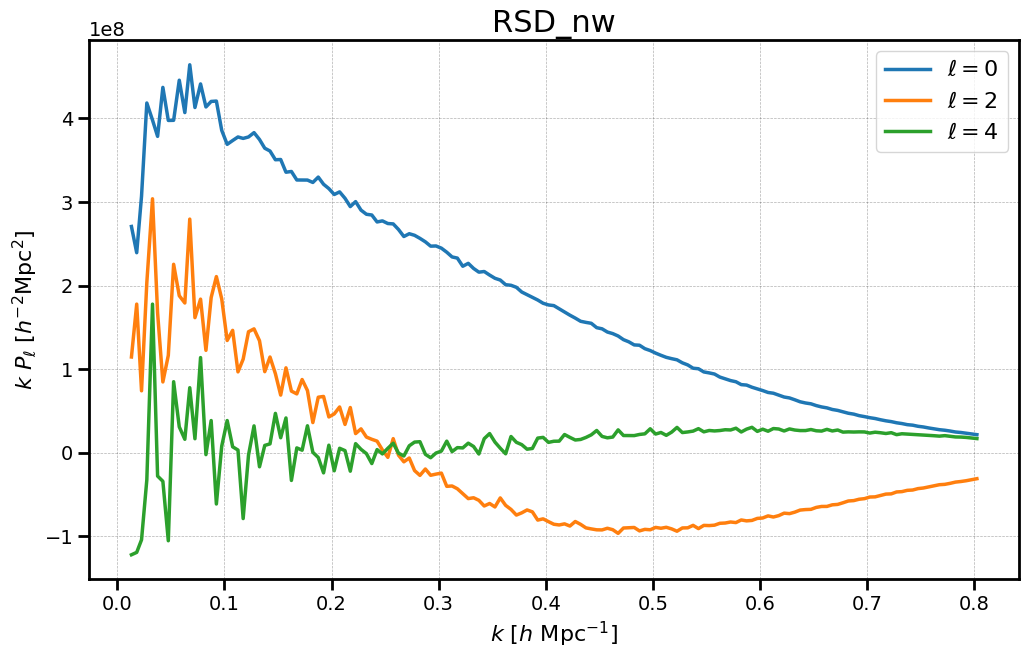

In [23]:
density(cat_nw)
# plt.xlim(0.01, 0.6)
# plt.ylim(-1000, 1000)
plt.title('RSD_nw')

In [24]:
num = '12_5'
cat = m.data_read(num)
vel = cat['CentralMvir']

In [25]:
cat = RED(cat)

[[-0.         -0.          4.20162003]
 [ 0.         -0.          6.95149313]
 [-0.         -0.          6.80930946]
 ...
 [ 0.         -0.          2.03636632]
 [ 0.         -0.          5.97995767]
 [-0.         -0.          3.40842161]]
[[   7.97691631   15.1149559     6.00673501]
 [   7.74570322   15.13822651    8.75313257]
 [   7.90744686   15.13297081    8.36540327]
 ...
 [   2.11205387   17.46072578  996.0491837 ]
 [   2.61545062   17.27146912 1000.14456949]
 [   2.81020856   17.09973907  997.35849485]]


In [26]:
cat['RsdPos_x'] = cat['RsdPos_x']%1000

In [27]:
(-1)%1000


999

In [28]:
def density_2(cat):
    if 'weight' not in cat:
        #无权重
        cat['weight'] = 1

    if 'RsdPos_x' in cat:
        mesh = cat.to_mesh(window ='tsc', Nmesh=256,BoxSize=1000,compensated=False,interlaced=True,position='RsdPos_x')
        r = FFTPower(first=mesh,Nmesh=256, mode='2d', BoxSize=1000,dk=0.005, kmin=0.01, Nmu=5, los=[0,0,1], poles=[0,2,4])
    # else:
    #     mesh = cat.to_mesh(window='tsc', Nmesh=512, BoxSize=1000,interlaced=True,compensated=True, position='Pos', weight='weight')
    #     r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[2,4])     
    poles = r.poles
    print(poles)
    print("variables = ", poles.variables)
    for ell in [0, 2, 4]:
        label = r'$\ell=%d$' % (ell)
        P = poles['power_%d' %ell].real
        if ell == 0: P = P - poles.attrs['shotnoise']
        # if ell == 2
        # line, = plt.plot(x, y, label="")
        plt.plot(poles['k'], poles['k'] * P, label=label)
        # line.set_color('')
    plt.legend(loc=0)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")

/tmp/ipykernel_23924/1598442999.py:7: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(window ='tsc', Nmesh=256,BoxSize=1000,compensated=False,interlaced=True,position='RsdPos_x')


<BinnedStatistic: dims: (k: 159), variables: 5 total>
variables =  ['k', 'power_0', 'power_2', 'power_4', 'modes']


Text(0.5, 1.0, 'RSD')

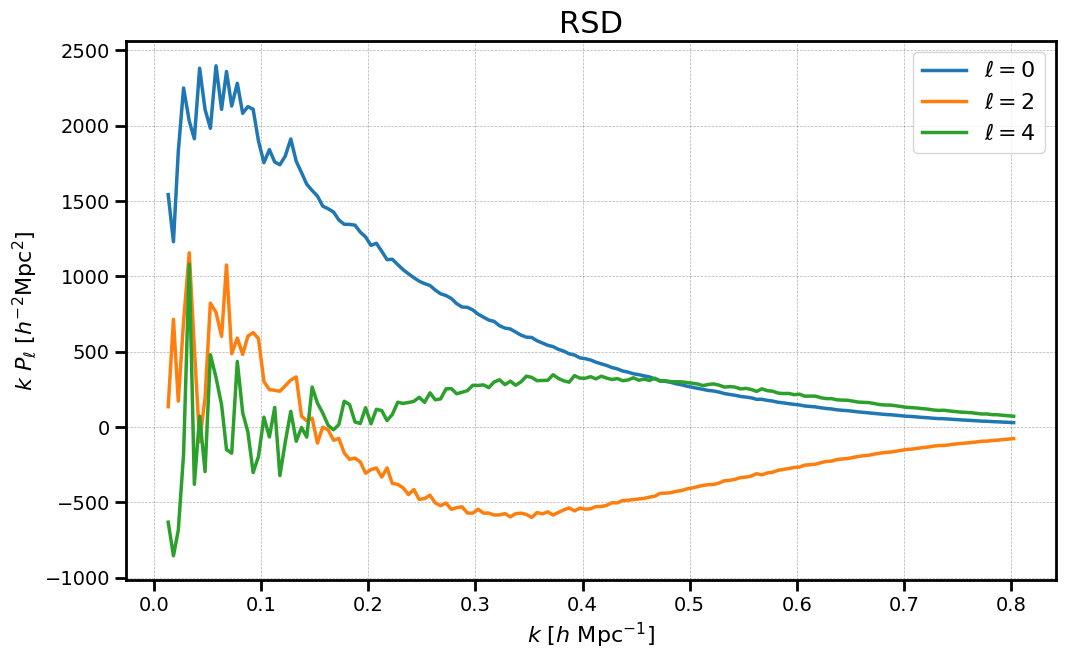

In [29]:
density_2(cat)
# plt.xlim(0.01, 0.6)
# plt.ylim(-1000, 1000)
plt.title('RSD')

In [49]:
def density_3(cat):
    # if 'weight' not in cat:
    #     #无权重
    #     cat['weight'] = 1

    if 'RsdPos_x' in cat:
        mesh = cat.to_mesh(window ='cic', Nmesh=512,BoxSize=1000,compensated=True,interlaced=True,position='RsdPos_x', value='CentralMvir')
        r = FFTPower(first=mesh,Nmesh=512, mode='2d', BoxSize=1000,dk=0.005, kmin=0.01, Nmu=5, los=[0,0,1], poles=[0,2,4])
    # else:
    #     mesh = cat.to_mesh(window='tsc', Nmesh=512, BoxSize=1000,interlaced=True,compensated=True, position='Pos', weight='weight')
    #     r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[2,4])     
    poles = r.poles
    print(poles)
    print("variables = ", poles.variables)
    for ell in [0, 2, 4]:
        label = r'$\ell=%d$' % (ell)
        P = poles['power_%d' %ell].real
        # if ell == 0: P = P - poles.attrs['shotnoise']
        # if ell == 2
        # line, = plt.plot(x, y, label="")
        plt.plot(poles['k'], poles['k'] * P, label=label)
        # line.set_color('')
    plt.legend(loc=0)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")

In [50]:
density_3(cat)
# plt.xlim(0.01, 0.6)
# plt.ylim(-1000, 1000)
k_ny = numpy.pi * 256 / 1000
plt.axvline(x=k_ny, c='k', label="Nyquist frequency for Nmesh=256")
plt.title('RSD')

/tmp/ipykernel_23924/276809522.py:7: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(window ='cic', Nmesh=512,BoxSize=1000,compensated=True,interlaced=True,position='RsdPos_x', value='CentralMvir')


In [38]:
cat['Vx'] = cat['Vel']*(1,0,0)

In [47]:
# momentum_mesh = cat.to_mesh(interlaced=True,compensated=True, Nmesh=256, BoxSize=1000, window='tsc', position='RsdPos_x', value='Vx')
mesh = cat.to_mesh(interlaced=False,compensated=False, Nmesh=256, BoxSize=1000, window='tsc', position='RsdPos_x', value='CentralMvir')

/tmp/ipykernel_23924/4176466641.py:2: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=False,compensated=False, Nmesh=256, BoxSize=1000, window='tsc', position='RsdPos_x', value='CentralMvir')


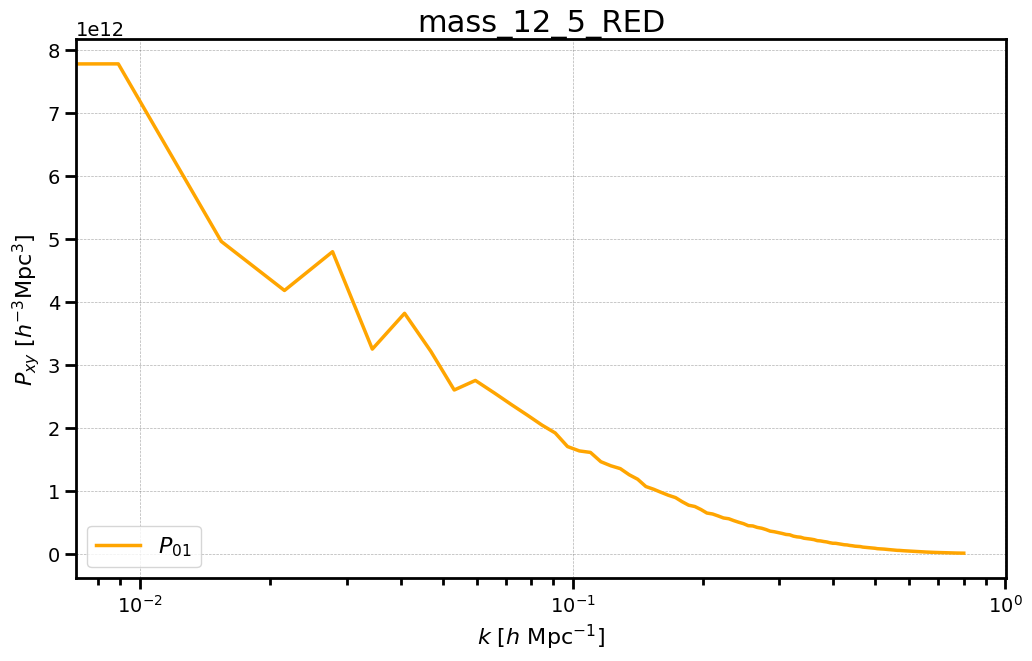

In [48]:
r00 = FFTPower(mesh, mode='1d', los=[1,0,0])
P00 = r00.power['power'].real - r00.attrs['shotnoise']
plt.loglog(r00.power['k'], P00, label=r"$P_{01}$", color='orange')
# plt.loglog(r00_nw.power['k'], P00_nw, label=r"$P_{01nw}$", linestyle='--', color='orange')
plt.title("mass_12_5_RED")
plt.legend(loc='lower left', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
# plt.xlim(0.01, 0.6)
# # plt.xscale('linear')
plt.yscale('linear')

In [32]:
from scipy.interpolate import InterpolatedUnivariateSpline as spline
# use a high-resolution mesh to get the truth
mesh = cat.to_mesh(window='tsc', Nmesh=512,BoxSize=1000, compensated=True, position='RsdPos_x')

# compute the 1D power of this mesh
r = FFTPower(mesh, mode='1d')

# create a smooth interpolation
truth = r.power
truth = spline(truth['k'], truth['power'].real - truth.attrs['shotnoise'])



/tmp/ipykernel_16693/3337421989.py:3: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(window='tsc', Nmesh=512,BoxSize=1000, compensated=True, position='RsdPos_x')


In [33]:
for interlaced in [True, False]:
    for window in ['CIC', 'TSC']:

        # convert catalog to a mesh with desired window and interlacing
        mesh = cat.to_mesh(Nmesh=256, BoxSize=1000, window=window, compensated=False, interlaced=interlaced, position='RsdPos_x')

        # apply correction for the window to the mesh
        compensation = mesh.compensate if window == 'CIC' else mesh.compensate_tsc
        mesh = mesh.apply(compensation, kind='circular', mode='complex')

        # compute the 1D power P(k)
        r = FFTPower(mesh, mode='1d')
        Pk = r.power

        # compare P(k) to the hi-resolution mesh P(k)
        label = 'interlaced=%s, window=%s' %(interlaced, window)
        plt.plot(Pk['k'], (Pk['power'].real - Pk.attrs['shotnoise']) / truth(Pk['k']), label=label)

BoxSize = 1000.
Nmesh = 256
# plot Nyquist frequency
k_ny = numpy.pi * Nmesh / BoxSize
plt.axvline(x=k_ny, c='k', label="Nyquist frequency for Nmesh=256")


# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k) / P(k)^\mathrm{truth}$")
plt.ylim(0.9, 1.2)

/tmp/ipykernel_16693/1993511385.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(Nmesh=256, BoxSize=1000, window=window, compensated=False, interlaced=interlaced, position='RsdPos_x')


AttributeError: 'CatalogMesh' object has no attribute 'compensate'

In [ ]:
mesh = cat.to_mesh(Nmesh=256, BoxSize=1000, window=window, compensated=False, interlaced=interlaced, position='RsdPos_x')

In [ ]:
help(mesh.apply())